In [21]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression #remember, this is linear regression model from sk-learn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [22]:
df = pd.read_csv('funda-amsterdam.csv')
df.head()

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906


In [75]:
# Clean up the price variable. 
df.info()
# df['price'].max()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11081 entries, 0 to 11442
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     11081 non-null  int64  
 1   address        11081 non-null  object 
 2   area           11081 non-null  int64  
 3   bedrooms       11081 non-null  int64  
 4   postal_code    11081 non-null  object 
 5   posting_date   11081 non-null  object 
 6   price          11081 non-null  int64  
 7   property_type  11081 non-null  object 
 8   rooms          11081 non-null  int64  
 9   sale_date      11081 non-null  object 
 10  url            11081 non-null  object 
 11  year_built     11081 non-null  int64  
 12  price_p        11081 non-null  float64
 13  residuals      11081 non-null  float64
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


999999

In [24]:
df = df[df["price"]>5000]

df.dropna()

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
...,...,...,...,...,...,...,...,...,...,...,...,...
11438,11438,Olympiaplein 83 -III,113,3,1077 CS,22-5-2015,599000,apartment,5,3-6-2015,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
11439,11439,Anjeliersstraat 20,88,2,1015 NH,12-5-2015,399000,apartment,3,29-5-2015,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1993
11440,11440,Rustenburgerstraat 389 I,77,2,1072 GV,6-6-2015,399000,apartment,4,19-6-2015,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
11441,11441,Doggersbankstraat 12 II,90,3,1055 NX,2-5-2015,259000,apartment,4,19-5-2015,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1931


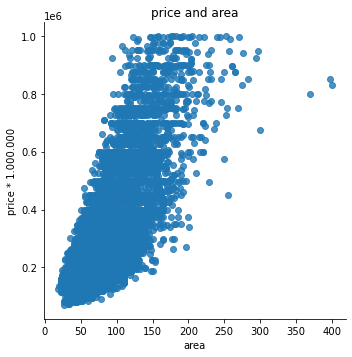

In [25]:
# Make a scatter plot of price and surface area, 
# both with and without a regression line. Which should be X and which should be Y?

sns.lmplot(x='area', y='price', fit_reg=False, data=df) #fit_reg=False leaves out the regression line; see below
plt.xlabel('area')
plt.ylabel('price * 1.000.000')
plt.title('price and area')
plt.show()

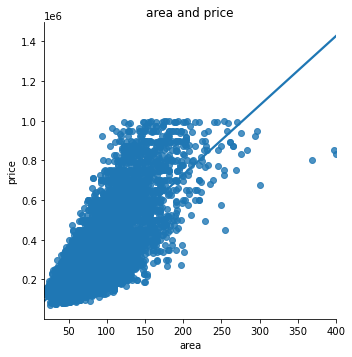

In [26]:
sns.lmplot(x='area', y='price', data=df, ci=False) #The last argument leaves out a so-called "confidence interval"
plt.title('area and price')
plt.xlabel('area')
plt.ylabel('price')
plt.show()

In [27]:
# Train a linear model for the relation using sk-learn. 
# Write down the complete formula with X, Y and the coefficients b0 and b1 (as numbers). 
# Use a Markdown cell and write the formula in pretty math notation.

from sklearn.linear_model import LinearRegression #we need this specific model from sk-learn

#To use sk-learn, we need to create lists of the two variables
#Note that you need to use [[ ]] with x. This creates a Pandas Data Frame (table), rather than a Pandas Series (list).
#lm.fit needs a Data Frame (or matrix) for x, because x can be multiple variables
x = df[['area']] 
y = df['price']
lm = LinearRegression() #this creates a new LR model
lm.fit(x, y) #this "fits" the model

b0 = lm.intercept_ #gets the intercept
b1 = lm.coef_[0] #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list

print(f"The regression line is equal to y = {b0:.2f} + {b1:.2f}X") #.0f formats to 2 decimals. 

The regression line is equal to y = 27983.93 + 3498.81X


In [28]:
df['price_p'] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe
df.head(10)

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built,price_p
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,405855.880756
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938,192428.204791
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003,433846.395637
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910,230915.162752
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,248409.234552
5,5,Bertrand Russellstraat 46,125,2,1097 HL,20-5-2016,515000,apartment,3,9-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1991,465335.724877
6,6,Admiraal De Ruijterweg 417 I,64,3,1055 ME,14-6-2016,200000,apartment,4,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,251908.048913
7,7,Deltastraat 10 -boven,155,3,1078 PC,24-5-2016,599000,apartment,5,9-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,570300.155680
8,8,Ben van Meerendonkstraat 49,85,2,1087 LB,21-5-2016,249000,apartment,3,10-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2007,325383.150474
9,9,Jacob van Lennepstraat 263 B,67,2,1053 JE,13-5-2016,300000,apartment,3,27-5-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1900,262404.491993


In [29]:
lm.predict([[70]])


array([272900.93507299])

In [30]:
# Use sk-learn to predict the price for all the houses in the dataset. 
# What is the prediction for Slichtenhorststraat 10? What is the residual? 
# Note: how to get this value is not in the example Notebook, but perhaps you can figure out how to retrieve it.

house = df.loc[df['address'] == 'Slichtenhorststraat 10']
residual = house['price_p'] - house['price']

int(residual)

192348

In [31]:
#Calculate the residuals (e) and add them to the dataframe

df['residuals'] = df['price_p'] - df["price"]
df.head()

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built,price_p,residuals
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,405855.880756,-104144.119244
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938,192428.204791,-22571.795209
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003,433846.395637,108846.395637
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910,230915.162752,-84084.837248
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,248409.234552,48409.234552


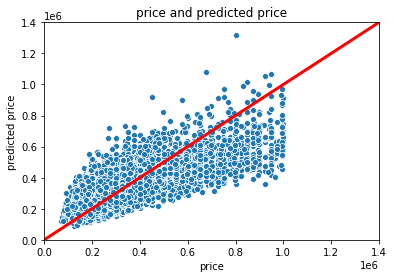

In [32]:
# Make the following plots:
# A scatter plot of (Y, Y’) (Y’ means predicted Y)
# A scatter plot of (X, e) 

sns.scatterplot(x='price', y='price_p', data=df) #fit_reg=False leaves out the regression line; see below
plt.xlim(0, 1400000)
plt.ylim(0, 1400000)
# draw the diagonal
plt.plot([0, 1.6e6], [0, 1.6e6], color='red', lw=3)
plt.xlabel('price')
plt.ylabel('predicted price')
plt.title('price and predicted price')
plt.show()

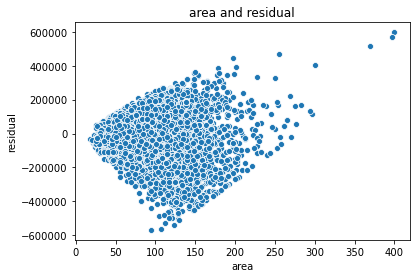

In [33]:
sns.scatterplot(x='area', y='residuals',  data=df) #fit_reg=False leaves out the regression line; see below
plt.xlabel('area')
plt.ylabel('residual')
plt.title('area and residual')
plt.show()

In [34]:
# What is the R2 of the model?
r2_score(df['price'], df['price_p']) #this gives the model fit (R2) for the Y and predicted Y

0.5257421182315432

In [35]:
# What is the root mean squared error (RMSE)?
math.sqrt(mean_squared_error(df['price'], df['price_p']))

118016.87861535022

### What is your conclusion about the fit? Which houses are predicted better? Cheap or expensive house?

r2: 0.53 so 53% percent change that the houses are predicted correctly.
SQRT - 118016. how much the prediction is typically off. this is 118016, which is more for cheap houses than for expensive houses percentually. 
the cheap houses are predicted to expensive and the expensive houses vice versa. 

the big houses are predicted worse and too low. 

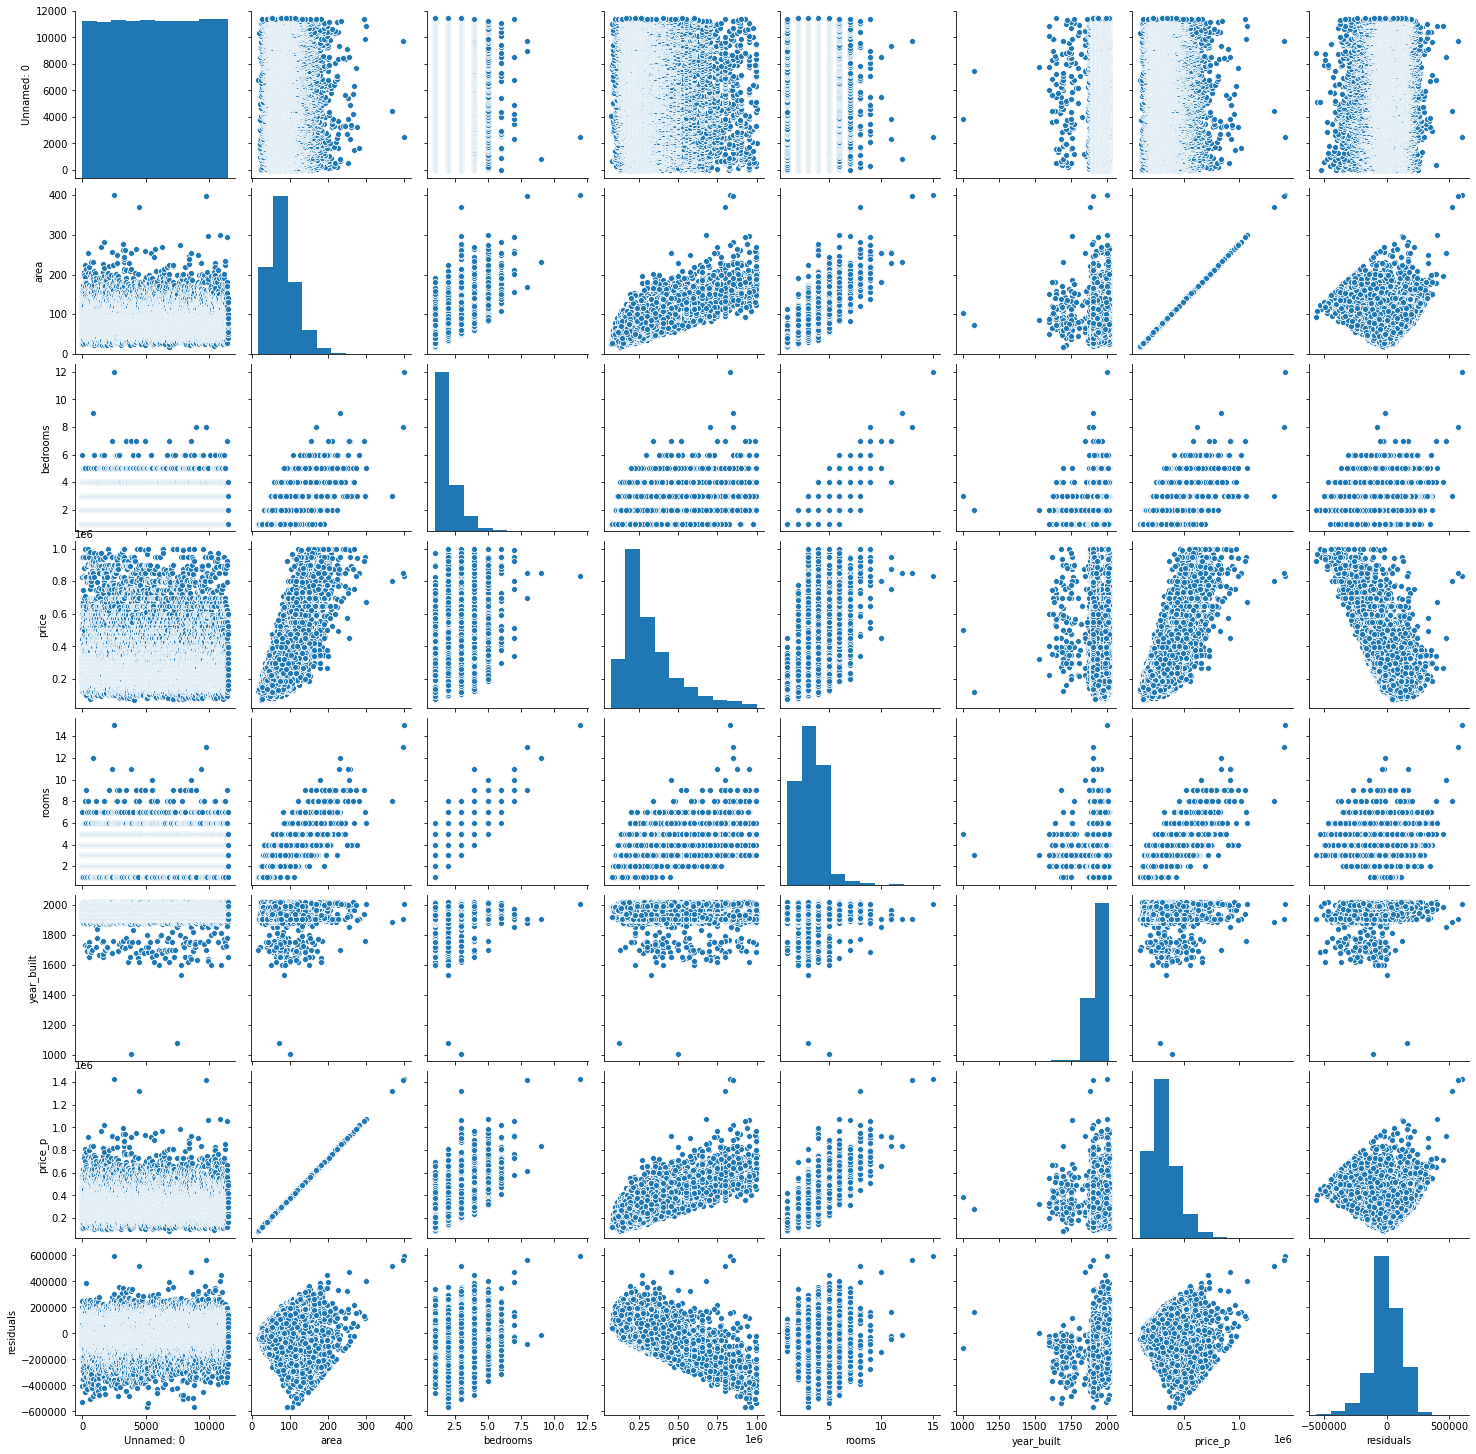

In [36]:
# Make a scatterplot matrix 
sns.pairplot(df)
plt.show()


In [37]:
# and a correlation matrix of the Funda data set
df.corr()

,Unnamed: 0,area,bedrooms,price,rooms,year_built,price_p,residuals
Unnamed: 0,1.000000,-2.093777e-02,-0.014037,-0.080315,-0.013914,0.001041,-2.093777e-02,9.457934e-02
area,-0.020938,1.000000e+00,0.752925,0.725081,0.781526,0.208073,1.000000e+00,1.589985e-16
bedrooms,-0.014037,7.529253e-01,1.000000,0.468601,0.915269,0.177486,7.529253e-01,1.122915e-01
price,-0.080315,7.250808e-01,0.468601,1.000000,0.540556,-0.166731,7.250808e-01,-6.886638e-01
rooms,-0.013914,7.815258e-01,0.915269,0.540556,1.000000,0.110580,7.815258e-01,3.791889e-02
year_built,0.001041,2.080729e-01,0.177486,-0.166731,0.110580,1.000000,2.080729e-01,4.611839e-01
price_p,-0.020938,1.000000e+00,0.752925,0.725081,0.781526,0.208073,1.000000e+00,1.641638e-16
residuals,0.094579,1.589985e-16,0.112291,-0.688664,0.037919,0.461184,1.641638e-16,1.000000e+00


In [43]:
# Based on this, choose 3 variables from the Funda data set as your independent variables (X) 
# for the dependent variable price (Y). 
# You want variables that have a linear relation and correlate well with price. 
# Note: it does not work very well to select variables that are highly correlated with each other, 
#     such as rooms and bedrooms.

# bedrooms, rooms and year_built

#Split the data into a test set and a train set

 

y = df['price'] #We need to take out the rating as our Y-variable
X = df[['rooms','bedrooms','year_built']] #this slices the dataframe to include all rows and the columns from "action" to "metascore"
X.index = df['price'] #this stores the movie names in the column names, so we don't lose track of them later
X.head()


,rooms,bedrooms,year_built
price,,,
510000,3,2,1906
215000,2,1,1938
325000,3,2,2003
315000,3,2,1910
200000,3,1,1906


In [44]:
#This built-in function from sk-learn splits the data set randomly into a train set and a test set
#By stating random_state = 1, we use one particular "random state" 
# (we could use any number, it's a so-called "random seed"). 
#This means if we run the code again, it will produce the same results. Which can be handy.
#test_size = 0.3, so I'm splitting the data into 70% training data and 30% test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables
X_train.head() #The train data

,rooms,bedrooms,year_built
price,,,
139500,3,2,1986
995000,5,3,1906
518000,4,3,2016
147500,1,1,2014
269000,3,2,1991


In [45]:
lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train) #train the model

In [63]:
coef = pd.DataFrame(X.columns.values, lm.coef_) #this creates a df with a column with the column names, and the coefficients of the model
coef

,0
94491.687892,rooms
-15133.152192,bedrooms
-765.578849,year_built


How to interpret?
for each extra room the price goes up with 99491.
for each bedroom the price goes down?
for the year built the price goes down. so older houses are more expensive.

# nu gaan we predicten

In [69]:
y_test_p = lm.predict(X_test) #Generate predictions for the test data. So we use X.test, not X.train
r2_score(y_test, y_test_p)


0.3559635717535704

R2 score is 36%. this means that 36% of the variation is explained by the model. That is okay?

In [71]:
#RMSE
math.sqrt(mean_squared_error(y_test, y_test_p))


138207.984138968

the RMSE is 138207 EUR. so the price is typically that much off.

In [72]:
# plotten

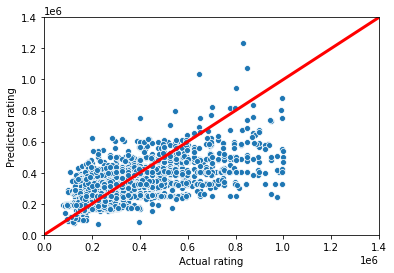

In [81]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('Actual rating')
plt.ylabel('Predicted rating')
plt.xlim([0, 1.4e6]) #Forcing the x- and y-axis to be the same length, so that we can compare 
plt.ylim([0, 1.4e6])
plt.plot([0, 1.4e6], [0, 1.4e6], color='red', lw=3) #Plot a diagonal length
plt.show()

What about the predictions...
the highter the price, the more off (lower) they are. 